In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [96]:
df = pd.read_csv(r'C:\Users\CVR\Downloads\titanic_dataset.csv')
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [97]:
# Check for missing values
print(df.isnull().sum())

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64


In [98]:

# Fill missing values for 'Age' and 'Embarked' columns
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [99]:
# Convert categorical columns into numeric values
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])  # Male: 1, Female: 0
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])  # C: 0, Q: 1, S: 2


In [100]:

# Drop unnecessary columns (like Name, Ticket, Cabin)
df = df.drop(['Name', 'Ticket', 'Cabin'], axis=1)

In [101]:
# Define independent variables (X) and target variable (y)
X = df.drop('Survived', axis=1)  # Features
y = df['Survived']  # Target variable

In [102]:

# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [103]:
# Standardize the features (Only numeric columns)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit and transform on the training data
X_test = scaler.transform(X_test)  # Only transform the test data

In [104]:
# Initialize the Decision Tree classifier
classifier = DecisionTreeClassifier(criterion='gini', random_state=42)

In [105]:
# Train the classifier
classifier.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [106]:
# Make predictions on the test data
y_pred = classifier.predict(X_test)

In [107]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.82


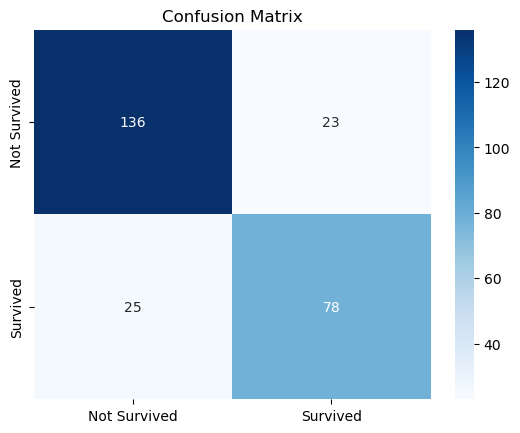

In [108]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title("Confusion Matrix")
plt.show()A